Actual :1 and Predicted :1
Actual :0 and Predicted :0
Actual :1 and Predicted :1
Accuracy :1.0


D:\Capgemeni Training\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


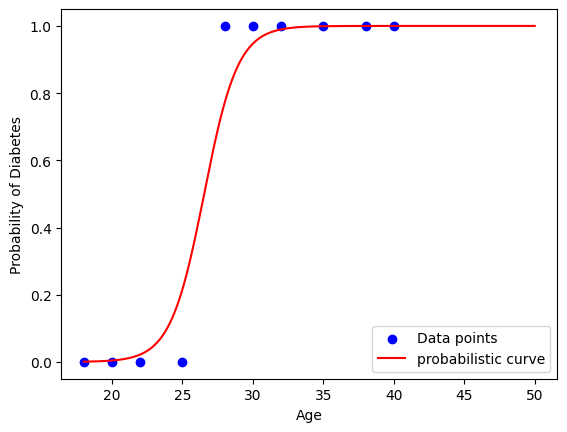

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('../Dataset/data/BMI_dataset - Sheet1.csv')
X=df[['BMI']]
y=df['Diabetes']

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3,random_state=42
)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
for actual,pred in zip(y_test, y_pred):
    print(f"Actual :{actual} and Predicted :{pred}")

print(f"Accuracy :{accuracy_score(y_test,y_pred)}")
plt.scatter(X,y,color='blue',label='Data points')
x_range = np.linspace(18,50,200).reshape(-1,1)
y_prob = model.predict_proba(x_range)[:,1]
plt.plot(x_range,y_prob,color='red',label='probabilistic curve')
plt.xlabel('Age')
plt.ylabel('Probability of Diabetes')
plt.legend()
plt.show()

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler # feature engineering skill
# (x - u(meu)) / sigma()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=[[5,2,3],[4,1,4],[1,5,2],[2,4,1],[5,1,5],
   [3,5,1],[1,4,3],[5,3,4],[2,1,4],[3,4,2]]
y=[1,1,0,0,1,0,0,1,1,0]

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3,random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit_transform is for training data
X_test = scaler.transform(X_test) # transform  is for testing the data

for k in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print(f"K={k}  Accuracy={acc:.2f}")

# Best model — predict new user
best_knn = KNeighborsClassifier(n_neighbors=3)
best_knn.fit(X_train, y_train)
new_user = scaler.transform([[4, 2, 4]])
print("Will they like it?", best_knn.predict(new_user)[0])


K=1  Accuracy=1.00
K=3  Accuracy=1.00
K=5  Accuracy=1.00
Will they like it? 1
